In [1]:
from mcbj import *
from tqdm.notebook import tqdm
import filter_traces
import plots
import pandas as pd

date = "22_03_23"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
import numpy as np
from matplotlib.ticker import MultipleLocator

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
pull_traces = np.load(home_folder.joinpath('results/pull_filtered_traces_rate_2.npy'))
push_traces = np.load(home_folder.joinpath('results/push_filtered_traces_rate_2.npy'))

selected_traces = np.load(home_folder.joinpath('results/push_selected_traces_IV_rate_2.npy'))

In [11]:
selected_IVs = []
i = -1

In [1205]:
i += 1

Plotted trace: 27375
[  3.23655152 314.2975402 ] [0.0049356  0.48391562]


D:\Greta\mcbj_stm-bj\mcbj.py:3027: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(multiplier * areas) / avg_value  # unitless
D:\Greta\mcbj_stm-bj\mcbj.py:3030: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.ones_like(multiplier) * areas) / avg_value  # unitless \Delta I/ I


0.4849363076357853


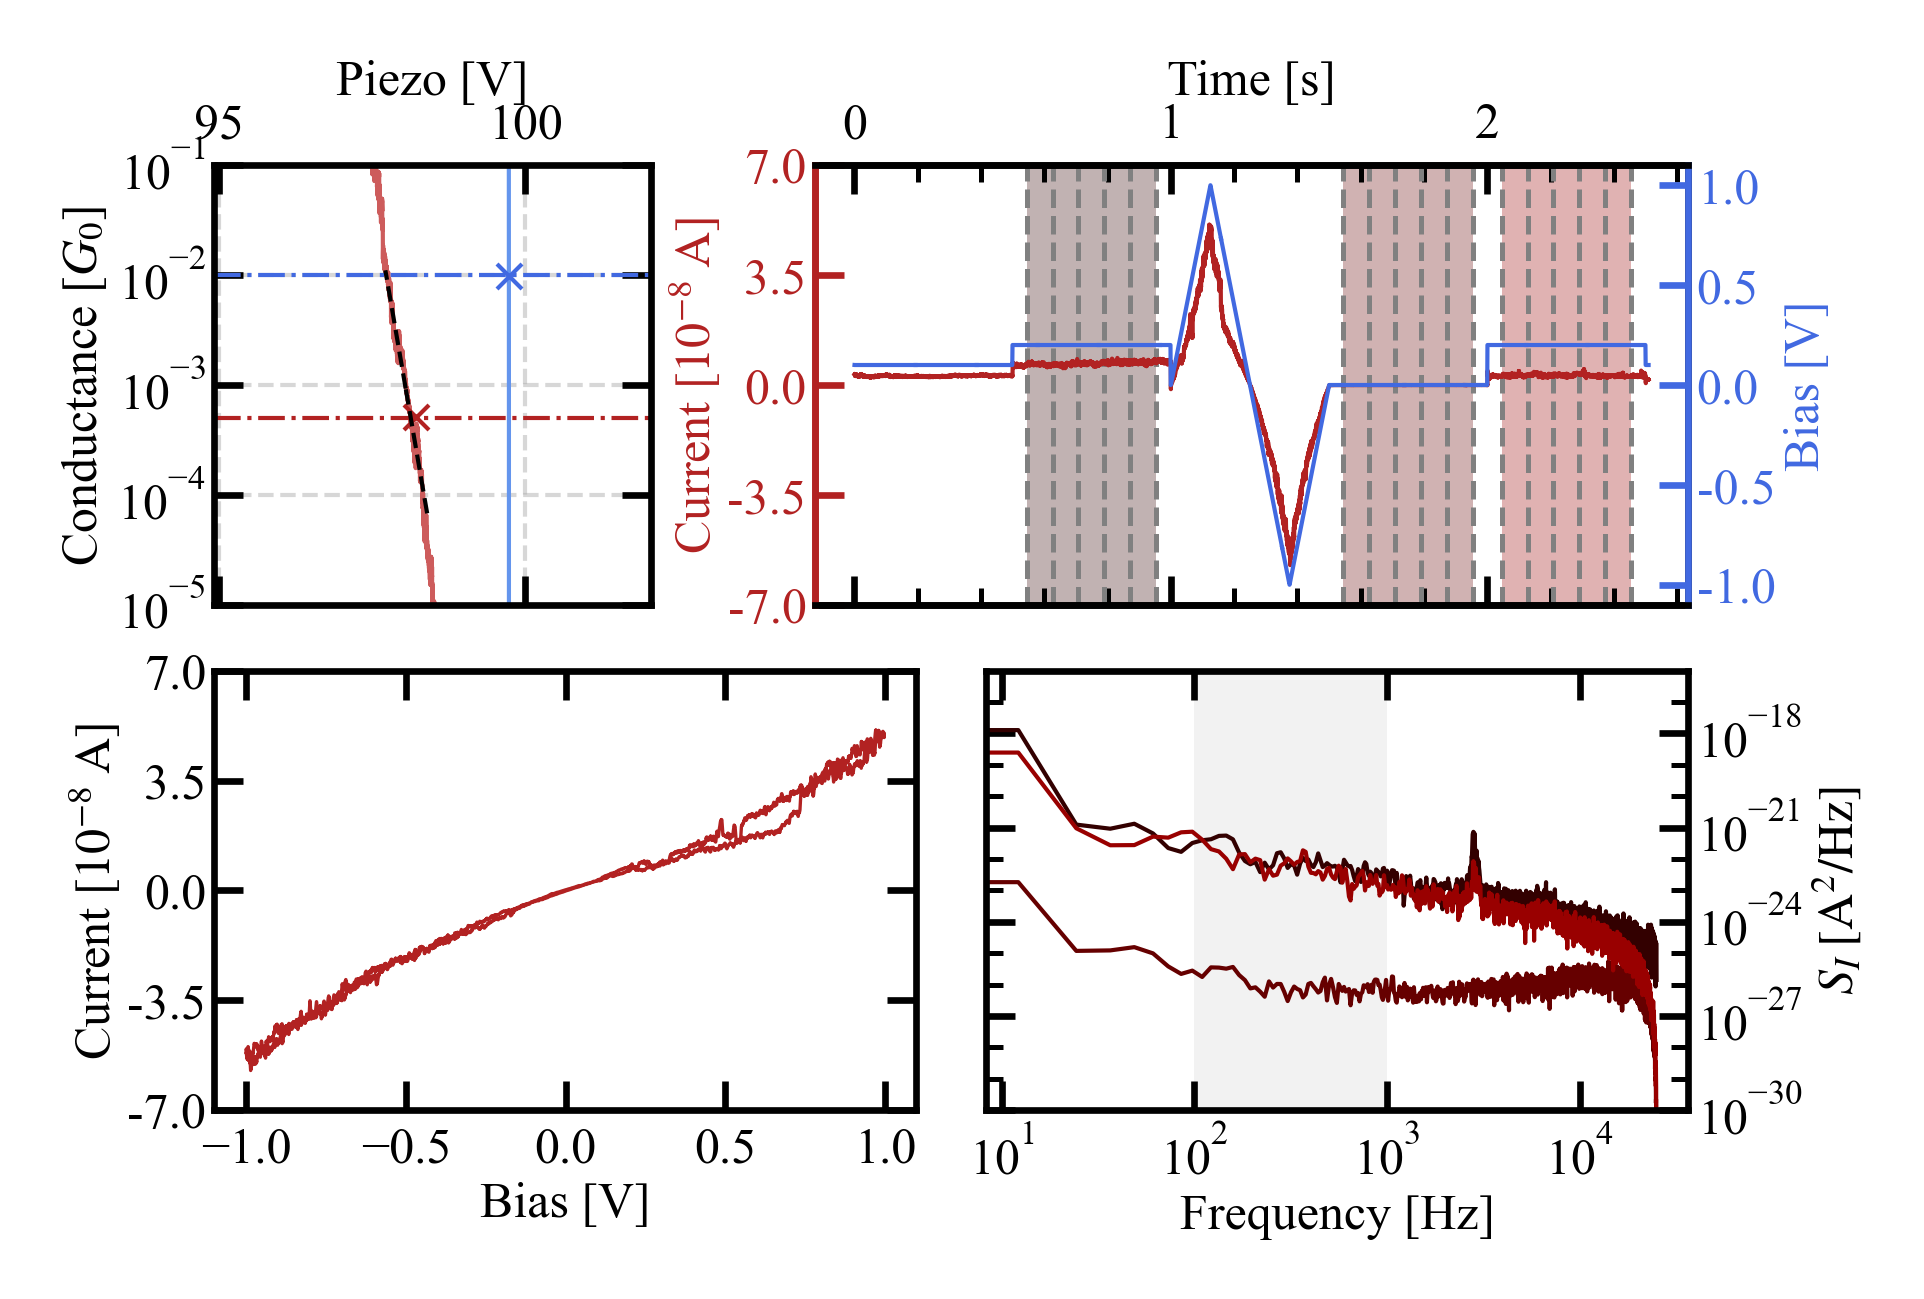

In [1206]:
which_trace = selected_traces[i]
# which_trace = np.random.choice(selected_traces)
# which_trace = 25359
# which_trace = 25559
# which_trace = 28253
# which_trace = 27114
# which_trace = 27114

print(f'Plotted trace: {which_trace}')

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

popt, perr = trace_pair.fit_tunnel(conductance_range=(5e-5, 1e-2))
print(popt, perr)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=True)
ax_trace, ax_hold, par_hold, ax_iv, ax_psd = plots.plot_ivs_scheme_one(trace_pair=trace_pair,
                                                                       hold_trace=hold_trace,
                                                                       direction='push', which_psds=[1, 2, 3],
                                                                       smoothing=20, fig_size=utils.cm2inch(7.8, 5))
# ax_trace.set_xlim(95.5, 99.0)
ax_trace.set_ylim(1e-5, 1e-1)
x = trace_pair.piezo_push[np.bitwise_and(trace_pair.conductance_push > 5e-5, trace_pair.conductance_push < 1e-2)]

ax_trace.plot(x, 10**utils.fit_func_lin(x, popt[0], popt[1]),
              ls='--', lw=0.5, c='k')

plt.savefig(home_folder.joinpath(f'results/IVS/selected/rate_2/fig_{which_trace}.png'), bbox_inches='tight')

print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))

In [1199]:
selected_IVs.append(which_trace)

In [1200]:
selected_IVs

[25239,
 25359,
 25438,
 25471,
 25488,
 25506,
 25507,
 25518,
 25522,
 25551,
 25555,
 25556,
 25564,
 25593,
 25614,
 25635,
 25640,
 25651,
 25659,
 25664,
 25666,
 25667,
 25669,
 25687,
 25690,
 25695,
 25707,
 25712,
 25714,
 25722,
 25723,
 25741,
 25744,
 25748,
 25783,
 25794,
 25825,
 25839,
 25848,
 25851,
 25858,
 25862,
 25864,
 25866,
 25879,
 25890,
 25917,
 25923,
 25949,
 25952,
 25956,
 25989,
 26009,
 26013,
 26019,
 26021,
 26022,
 26043,
 26051,
 26064,
 26094,
 26098,
 26103,
 26110,
 26124,
 26126,
 26135,
 26144,
 26167,
 26168,
 26173,
 26183,
 26185,
 26191,
 26201,
 26216,
 26242,
 26246,
 26248,
 26249,
 26250,
 26253,
 26256,
 26261,
 26262,
 26268,
 26275,
 26281,
 26284,
 26293,
 26308,
 26332,
 26340,
 26369,
 26384,
 26389,
 26392,
 26399,
 26402,
 26406,
 26435,
 26441,
 26443,
 26468,
 26478,
 26482,
 26484,
 26495,
 26514,
 26518,
 26522,
 26544,
 26545,
 26562,
 26565,
 26570,
 26580,
 26583,
 26605,
 26614,
 26643,
 26647,
 26676,
 26678,
 26681,


In [1210]:
selected_IVs_np = np.array(selected_IVs)
np.savetxt(home_folder.joinpath(f'results/IVS/selected/rate_2/manually_selected_IVs.txt'), selected_IVs_np)

In [492]:
# selected_IVs.pop(-1)

In [1207]:
print(len(selected_traces))
print(i)
print(i/len(selected_traces))
print(selected_traces[i])

522
301
0.5766283524904214
27375


In [1208]:
len(selected_IVs)/i

0.5415282392026578

In [1035]:
0.5*len(selected_traces)

261.0

In [ ]:
print(np.round(min(hold_trace.iv_bias_push)))
print(np.round(max(hold_trace.iv_bias_push)))
np.linspace(np.round(min(hold_trace.iv_bias_push)), np.round(max(hold_trace.iv_bias_push)), num=9)
np.arange(np.round(min(hold_trace.iv_bias_push)), np.round(max(hold_trace.iv_bias_push)), step=0.25)
np.arange(-0.7, 0.7, step=0.25)
print(max(hold_trace.iv_current_push))
print(max(hold_trace.iv_current_push)/(10**utils.get_exponent(max(hold_trace.iv_current_push))))
utils.get_exponent(max(hold_trace.iv_current_push))

In [17]:
max_curr = max(abs(hold_trace.iv_current_push))
max_curr = max_curr/10**utils.get_exponent(max_curr)
max_curr.round(1)

5.3

In [23]:
np.linspace(-1*np.ceil(max_curr), np.ceil(max_curr), num=5)

array([-6., -3.,  0.,  3.,  6.])

In [9]:
pull_traces = np.load(home_folder.joinpath('results/pull_filtered_traces_rate_1.npy'))
push_traces = np.load(home_folder.joinpath('results/push_filtered_traces_rate_1.npy'))

selected_traces = np.load(home_folder.joinpath('results/push_selected_traces_IV_rate_1.npy'))

Plotted trace: 31886
0.37563858178387366


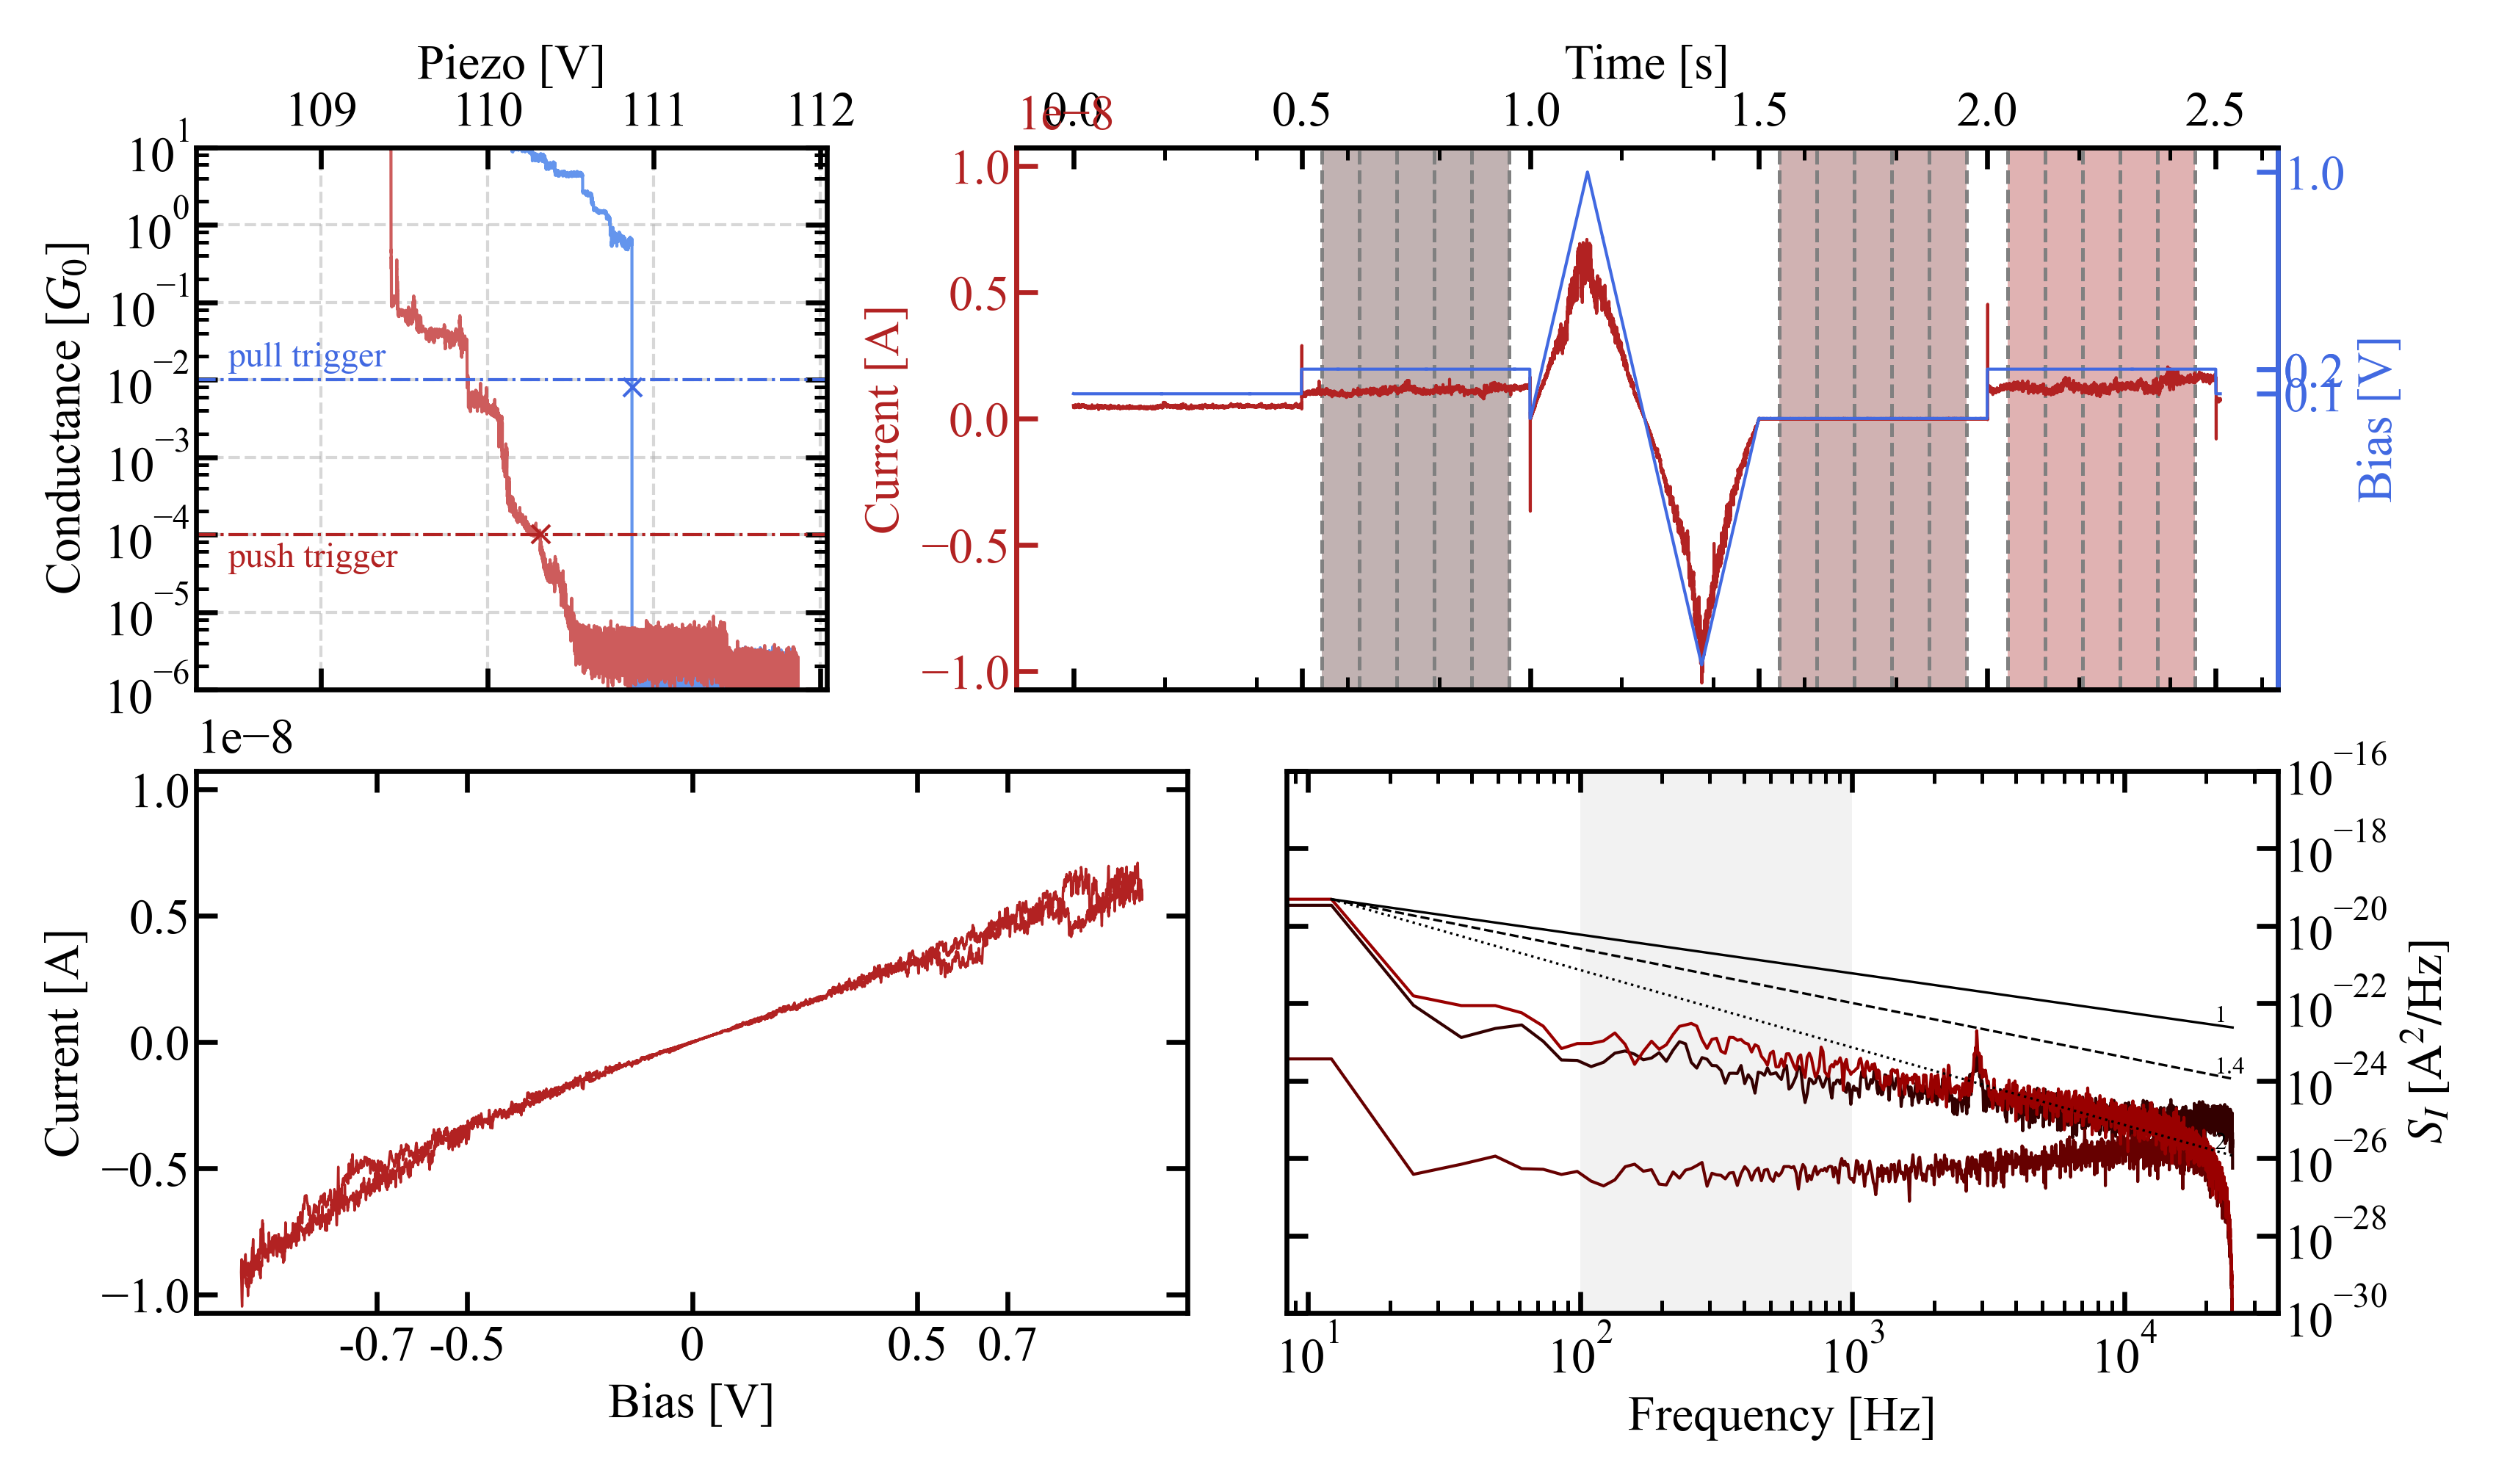

In [7]:
which_trace = np.random.choice(selected_traces)
# which_trace = 25359
print(f'Plotted trace: {which_trace}')

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=True)
plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push', which_psds=[1, 2, 3],
                         smoothing=10)

print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))